In [16]:
import pyfits
import matplotlib.pyplot as plt

import heapq
import pyfits
import matplotlib as plt
from pylab import *
import numpy as np
from decimal import *
import numpy
from scipy.optimize import curve_fit
from scipy.integrate import quad
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
from pylab import *
from scipy import stats
from scipy.stats import chisquare
import matplotlib.patches as patches
from astropy.io import fits


from astropy.cosmology import WMAP9 as cosmo

import pyfits
import matplotlib.pyplot as plt

import heapq
import pyfits
import matplotlib as plt
from pylab import *
import numpy as np
from decimal import *
import numpy
from scipy.optimize import curve_fit
from scipy.integrate import quad
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
from pylab import *
from scipy import stats
from scipy.stats import chisquare
import matplotlib.patches as patches

import sys 

sys.path.append('/usr/local/lib/python2.7/site-packages/ppxf')
sys.path

from __future__ import print_function

from astropy.io import fits
import numpy as np
import glob
from time import clock
from os import path

from ppxf import ppxf
import ppxf_util as util
plt.clf()




In [2]:
a=pyfits.open('q0.5_fg0.3_allrx10/broadband_200.fits')
#scidata=a['CAMERA-AUX'].data

In [3]:
filter_data = a['FILTERS'].data

''''FILTERS', which contains total magnitudes and luminosities 
(integrated over the whole image) for each filter and viewing angle. '''

"'FILTERS', which contains total magnitudes and luminosities \n(integrated over the whole image) for each filter and viewing angle. "

In [3]:
'''Next try to extract the broadband filters'''
''''CAMERA[N]-BROADBAND', which are data cubes of dimension 
[300 pixels] x [300 pixels] x [5 sdss filters]  and contain 
the actual images
Units are surface brightness in units of: 
IMUNIT  = 'W/m/m^2/sr'         / Pixel quantity is surface brightness           
UNITCONV= 9.45238524920703E-35 / [m^2/(kpc^2)]

Spatially, each pixel is 0.5 kpc for the early stage and 0.1666 kpc for the late stage'''

plt.clf()

camera_data = a['CAMERA0-BROADBAND'].data
camera_header = a['CAMERA0-BROADBAND'].header
#print(camera_header)
#So for example 0 is #1
#Need to take an extension ie [0] because there are 5 filters here

xs = np.linspace(0,shape(camera_data[0])[0]-1,shape(camera_data[0])[0])
xs_kpc = [0.5*x for x in xs]
print(shape(camera_data[0]))
plt.imshow(np.flipud(camera_data[0]), vmax=30)
plt.ylabel(r'kpc [0.5/unit]')
plt.xlabel(r'kpc [0.5/unit]')
plt.colorbar()
savefig('pyplots_q0.5_fg0.3_allrx10/200_CAMERA0_0.pdf')


'''write it out so that GALFIT can use it'''
outfile = 'q0.5_fg0.3_allrx10/test_out.fits'

hdu = fits.PrimaryHDU(np.flipud(camera_data[0]))
hdu.writeto(outfile, clobber=True)



(300, 300)
WARNING

: Overwriting existing file 'q0.5_fg0.3_allrx10/test_out.fits'. [astropy.io.fits.file]


In [4]:
'''CAMERA[N]-BROADBAND-NONSCATTER
for the effects without dust effects (scattering, attenuation)'''

plt.clf()

camera_data = a['CAMERA0-BROADBAND-NONSCATTER'].data
camera_header = a['CAMERA0-BROADBAND-NONSCATTER'].header
#print(camera_header)
#So for example 0 is #1
#Need to take an extension ie [0] because there are 5 filters here

xs = np.linspace(0,shape(camera_data[0])[0]-1,shape(camera_data[0])[0])
xs_kpc = [0.5*x for x in xs]
#print(shape(camera_data[0]))
plt.imshow(np.flipud(camera_data[4]))
plt.ylabel(r'kpc [0.5/unit]')
plt.xlabel(r'kpc [0.5/unit]')
plt.colorbar()
savefig('pyplots_q0.5_fg0.3_allrx10/020_CAMERA0_4_NONSCATTER.pdf')


In [4]:
'''Trying to tackle the freaking spectrum/SED file'''
#mcrx_200.fits
spec=pyfits.open('q0.5_fg0.3_allrx10/mcrx_200.fits')
'''The higher resolution one is here:'''
spec=pyfits.open('q0.5_fg0.3_allrx10_sunruns/mcrx_200.fits')
#These contain spectra from the 200th snapshot, for all camera angles

print(spec.info())
#So spec[25] is a camera HDU
print(shape(spec[25]))


Filename: q0.5_fg0.3_allrx10_sunruns/mcrx_200.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      20   ()              
1    SCATTERING_LAMBDAS  BinTableHDU     33   0R x 5C      [J, D, L, D, J]   
2    BHMODEL     BinTableHDU     14   0R x 0C      []   
3    GADGET      BinTableHDU     94   0R x 0C      []   
4    GRIDSTRUCTURE  BinTableHDU     20   1795657R x 1C   [L]   
5    LAMBDA      BinTableHDU     16   970R x 2C    [D, D]   
6    MAKEGRID    BinTableHDU     30   0R x 0C      []   
7    SFRHIST     BinTableHDU     83   0R x 0C      []   
8    STELLARMODEL  BinTableHDU     60   0R x 0C      []   
9    MCRX        BinTableHDU     62   0R x 0C      []   
10   CAMERA0-PARAMETERS  ImageHDU        33   (300, 300)   float32   
11   CAMERA1-PARAMETERS  ImageHDU        33   (300, 300)   float32   
12   CAMERA2-PARAMETERS  ImageHDU        33   (300, 300)   float32   
13   CAMERA3-PARAMETERS  ImageHDU        33   (300, 300)   float32   
14   CAME

In [32]:
#print(spec[0].header)

(970, 300, 300)
(970,)
header info XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / 8-bit bytes                                    NAXIS   =                    2 / 2-dimensional binary table                     NAXIS1  =                   16 / width of table in bytes                        NAXIS2  =                  970 / number of rows in table                        PCOUNT  =                    0 / size of special data area                      GCOUNT  =                    1 / one data group (required keyword)              TFIELDS =                    2 / number of fields in each row                   EXTNAME = 'LAMBDA  '           / name of this binary table extension            TTYPE1  = 'lambda  '           / label for field                                TFORM1  = 'D       '           / format of field                                TUNIT1  = 'm       '                                                            TTYPE

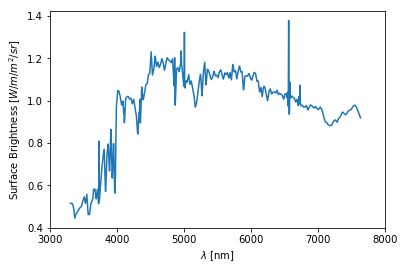

In [10]:
CAMERA0=spec[25]
#This is Camera 0 with an IFU datacube
print(shape(CAMERA0))

#practice extracting an aperture from this galaxy

'''How do you get the 968 dimension?'''
print(shape(CAMERA0.data[:,150,150]))#this is the middle pixel of the simulation
#print(CAMERA0.header)
#wavelengths are in HDU LAMBDA = 5th extension
#print('HDU Lambda',spec[5].data)
#print('WAVELENGTH info', spec['LAMBDA'].data)
'''Wavelength, you need to take the 0th dimension, not sure what the second one is'''

print('header info', spec[5].header)
#plt.imshow(CAMERA0.data[0])
#plt.show()
Ang=[x[0]*10**(10) for x in spec[5].data]#
plt.clf()
plt.plot(Ang,CAMERA0.data[:,150,150])
plt.xlim([3000,8000])
plt.xlabel(r'$\lambda$ [nm]')
plt.ylabel(r'Surface Brightness [$W/m/m^2/sr$]')
plt.show()

In [11]:
'''Now, I'm going to integrate the spectrum from the 200th snapshot'''


xmin=150
xmax=200
ymin=175
ymax=225

integrated=np.sum(CAMERA0.data[:,xmin:xmax,ymin:ymax],axis=(1,2))
#use a tuple to sum along two different axes



plt.clf()


#Try to figure out where you're targeting on the thing


f, axarr = plt.subplots(2)
axarr[0].plot(Ang,(integrated))
axarr[0].set_xlim([0,30000])
axarr[0].set_title('Integrated Spectrum')
axarr[0].set_xlabel(r'$\lambda$ [$\AA$]')
axarr[0].set_ylabel(r'Surface Brightness [$W/m/m^2/sr$]')

#now draw a box where you're making the SED cuts
rect = patches.Rectangle((xmin+(xmax-xmin)/2,ymin-(ymax-ymin)/2),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='red',facecolor='none')
# (upper left corner in x and y, x length, y length)
# Add the patch to the Axes
axarr[1].add_patch(rect)



#plot the broadband thing
'''broadband=np.sum(CAMERA0.data,axis=0)
print(broadband)
ax1=axarr[1].imshow((broadband),vmax=10000)
axarr[1].axhline(y=100, color='red')
axarr[1].axvline(x=100, color='red')

axarr[1].axhline(y=200, color='red')
axarr[1].axvline(x=200, color='red')


plt.colorbar(ax1)'''


broadband_cut=np.sum(CAMERA0.data[:,xmin:xmax,ymin:ymax],axis=0)
#MIDDLE DIMENSION IS ACTUALLY THE YS
ax2=axarr[1].imshow(np.sum(CAMERA0.data[:,:,:],axis=0),vmax=10000)
#axarr[1].axhline(y=xmin,  color='white')
#axarr[1].axhline(y=xmax,  color='white')
#axarr[1].axvline(x=ymin, color='white')
#axarr[1].axvline(x=ymax, color='white')
axarr[1].set_xlabel(r'0.166 / kpc')
plt.tight_layout()
#plt.show()
savefig('pyplots_q0.5_fg0.3_allrx10/200_SED_fiber.pdf')

In [30]:
'''Now I'm going to use plotting_fiber to make a pretty overlay of the MaNGA fiber as 
I begin to MaNGA-ize everything'''

cosmo.H(0)  
#Quantity 69.32 km / (Mpc s)>
kpc_arcmin=cosmo.kpc_proper_per_arcmin(0.03)#insert the redshift  
print(kpc_arcmin.value/60)

fig = plt.figure()
ax1 = fig.add_subplot(111, aspect='equal')

pixelscale=0.166666#kpc/pix
spacing=(2.5*(kpc_arcmin.value/60))/pixelscale
radius = (1*(kpc_arcmin.value/60))/pixelscale
correction = (0.25*(kpc_arcmin.value/60))/pixelscale


'''plotting_fiber(91)



The fibers in each bundle are 2.5" apart




#now draw a box where you're making the SED cuts

print('doin geometry',np.sin(math.radians(60)))


    



broadband_cut=np.sum(CAMERA0.data[:,xmin:xmax,ymin:ymax],axis=0)
#MIDDLE DIMENSION IS ACTUALLY THE YS
ax1.imshow(np.sum(CAMERA0.data[:,:,:],axis=0),vmax=10000)
#axarr[1].axhline(y=xmin,  color='white')
#axarr[1].axhline(y=xmax,  color='white')
#axarr[1].axvline(x=ymin, color='white')
#axarr[1].axvline(x=ymax, color='white')
ax1.set_xlabel(r'0.166 / kpc')
plt.tight_layout()
plt.show()

plt.clf()'''

plotting_fibers_r_e(37.57)#input is the effective radius in pixels FROM GALFIT

'''The fibers in each bundle are 2.5" apart'''




#now draw a box where you're making the SED cuts

print('doin geometry',np.sin(math.radians(60)))


    



broadband_cut=np.sum(CAMERA0.data[:,xmin:xmax,ymin:ymax],axis=0)
#MIDDLE DIMENSION IS ACTUALLY THE YS
#ax1.imshow(np.sum(CAMERA0.data[:,:,:],axis=0),vmax=10000)
ax1.imshow(result,vmax=10000)
#axarr[1].axhline(y=xmin,  color='white')
#axarr[1].axhline(y=xmax,  color='white')
#axarr[1].axvline(x=ymin, color='white')
#axarr[1].axvline(x=ymax, color='white')
ax1.set_xlabel(r'0.166 / kpc')
#plt.tight_layout()
#plt.show()

savefig('pyplots_q0.5_fg0.3_allrx10/Simulated_fiber_convolved.pdf')

0.6067249692472986
arcs_totes 30.96118638945177 Number of fibers 91
0 0.0 0
1 0.5 4.550455471176623
2 1.0 0
3 1.5 4.550455471176623
4 2.0 0
5 2.5 4.550455471176623
doin geometry 0.866025403784


In [134]:
def extract_spec( xmax, ymin, rad):
    
    plt.clf()
    '''This one is going to extract spectra and then convolve them with a Gaussian Kernal
    with resolution 72 km/s'''
    '''Also convolves with a Gaussian'''
    center_x=xmax
    center_y=ymin
    
    radius = arc_to_pix(rad)
    
    '''Step 1: Make a new image of just that spec'''
    #np.sum(CAMERA0.data[:,xmin:xmax,ymin:ymax],axis=0)
    x_coords=[]
    y_coords=[]
    new_cube=[]
    '''create an empty masked array'''
    mask_2d=np.zeros((len(CAMERA0.data[:,0,0]),len(CAMERA0.data[0,:,0]),len(CAMERA0.data[0,0,:])))

    #    masked_stel_vel=ma.masked_where((1/np.sqrt(data_stel_vel_ivar)) > 100 , data_stel_vel)
    for i in range(len(CAMERA0.data[0,:,0])):
        for j in range(len(CAMERA0.data[0,0,:])):
            if (center_x-i)**2+(center_y-j)**2 < radius**2:
                x_coords.append(i)
                y_coords.append(j)
                new_cube.append(CAMERA0.data[:,i,j])
                
            else:
                mask_2d[:,j,i]=1
    masked_cube= ma.masked_array(CAMERA0.data[:,:,:], mask=mask_2d)
    plt.imshow(np.sum(masked_cube,axis=0), interpolation='None', vmin=0, vmax=1e4)
    plt.colorbar()
    plt.show()
    
    plt.clf()


#Try to figure out where you're targeting on the thing

    integrated=np.sum(masked_cube,axis=(1,2))
    
    g = Gaussian1DKernel(0.01)

    # Convolve data
    z = convolve(integrated, g, boundary='extend')
    
    f, axarr = plt.subplots(2)
    axarr[0].plot(Ang,(integrated))
    axarr[0].plot(Ang,z,'red')
    axarr[0].set_xlim([3000,8000])
    axarr[0].set_title('Integrated Spectrum')
    axarr[0].set_xlabel(r'$\lambda$ [$\AA$]')
    axarr[0].set_ylabel(r'Surface Brightness [$W/m/m^2/sr$]')
    
    #now draw a box where you're making the SED cuts
    rect = patches.Circle((center_x,center_y),radius,linewidth=2,edgecolor='red',facecolor='none')
    axarr[1].add_patch(rect)
    
  
    
    
    broadband_cut=np.sum(masked_cube,axis=0)
    #MIDDLE DIMENSION IS ACTUALLY THE YS
    ax2=axarr[1].imshow(np.sum(masked_cube,axis=0), interpolation='None')
    #axarr[1].axhline(y=xmin,  color='white')
    #axarr[1].axhline(y=xmax,  color='white')
    #axarr[1].axvline(x=ymin, color='white')
    #axarr[1].axvline(x=ymax, color='white')
    axarr[1].set_xlabel(r'0.166 / kpc')
    plt.tight_layout()
    plt.show()
    #savefig('pyplots_q0.5_fg0.3_allrx10/extract_fiber.pdf')
    
    #image=CAMERA0.data[:,center_x-]
    #rect = patches.Circle((xmin+(xmax-xmin)+xs[k]*spacing-corr,ymin+i*np.sin(math.radians(60))*spacing),arc_to_pix(1),linewidth=2,edgecolor='white',facecolor='none')
    #            ax1.add_patch(rect)
    return Ang, integrated, z

def arc_to_pix(arc):
    return (arc*(kpc_arcmin.value/60))/pixelscale

def plotting_fiber(n_fibers):
    
    if n_fibers==19:
        index_1=[-2,-1,-1]
        index_2=[2,2,1]
        index_3=[5,4,3]
    
    if n_fibers==37:
        index_1=[-3,-2,-2,-1]
        index_2=[3,3,2,2]
        index_3=[7,6,5,4]
    
    if n_fibers==61:
        index_1=[-4,-3,-3,-2,-2]
        index_2=[4,4,3,3,2,2]
        index_3=[9,8,7,6,5]
    
    if n_fibers==91:
        xs_0=[-5,5,11]
        xs_1=[-4,5,10]
        xs_2=[-4,4,9]
        xs_3=[-3,4,8]
        xs_4=[-3,3,7]
        xs_5=[-2,3,6]
        
        '''Converting into a better format'''
        index_1=[-5,-4,-4,-3,-3,-2]
        index_2=[5,5,4,4,3,3]
        index_3=[11,10,9,8,7,6]

    if n_fibers==127:
        index_1=[-6,-5,-5,-4,-4,-3,-3]
        index_2=[6,6,5,5,4,4,3]
        index_3=[13,12,11,10,9,8,7]
    

        
    for i in range(len(index_1)):
        xs=np.linspace(index_1[i],index_2[i],index_3[i])
        xs=np.array(xs)
        if i % 2 == 0:#n % 2 == 0
                #in other words, if its an odd index you need to play with spacing
            
            corr=0   
        else:
            
            corr=radius+correction
        print(i,i/2,corr)
        
        for k in range(len(xs)):
            if i==0:#this is to only plot once for the middle row
                rect = patches.Circle((xmin+(xmax-xmin)+xs[k]*spacing-corr,ymin+i*np.sin(math.radians(60))*spacing),arc_to_pix(1),linewidth=2,edgecolor='white',facecolor='none')
                ax1.add_patch(rect)
            else:
                rect = patches.Circle((xmin+(xmax-xmin)+xs[k]*spacing-corr,ymin+i*np.sin(math.radians(60))*spacing),arc_to_pix(1),linewidth=2,edgecolor='white',facecolor='none')
                #if (xrows[2]-xsub)/2 == 0:#in other words, if its odd
                ax1.add_patch(rect)
                rect = patches.Circle((xmin+(xmax-xmin)+xs[k]*spacing-corr,ymin-i*np.sin(math.radians(60))*spacing),arc_to_pix(1),linewidth=2,edgecolor='white',facecolor='none')
                #if (xrows[2]-xsub)/2 == 0:#in other words, if its odd
                ax1.add_patch(rect)
    '''I'd also like to plot a huge line scale for the full diameter of the packet (in kpc and "?)'''
    #ax1.axhline(y=ymin+(len(index_1)+2)*np.sin(math.radians(60))*spacing,xlim=(xmin+(xmax-xmin)+index_1[0]*spacing,xmin+(xmax-xmin)+index_2[0]*spacing), color='white', lw=2)
    from matplotlib import collections  as mc

    lines = [[(xmin+(xmax-xmin)+index_1[0]*spacing-radius-arc_to_pix(0.25),ymin+(len(index_1)+2)*np.sin(math.radians(60))*spacing),(xmin+(xmax-xmin)+index_2[0]*spacing+radius+arc_to_pix(0.25),ymin+(len(index_1)+2)*np.sin(math.radians(60))*spacing)]]
    
    #lines = [[(xmin+(xmax-xmin)+index_1[0]*spacing-radius,ymin),(xmin+(xmax-xmin)+index_2[0]*spacing+radius,ymin)]]
    
    length=(xmin+(xmax-xmin)+index_2[0]*spacing+radius+arc_to_pix(0.25))-(xmin+(xmax-xmin)+index_1[0]*spacing-radius-arc_to_pix(0.25))
    '''This is a length in pixels'''
    length_kpc=length*pixelscale
    '''Now its in kpc'''
    length_arc=length_kpc/(kpc_arcmin.value/60)
    ax1.annotate(str(length_arc)+r'$^{\prime\prime}$',xy=(xmin+(xmax-xmin)+index_1[0]*spacing-radius,ymin+(len(index_1)+1.5)*np.sin(math.radians(60))*spacing),xycoords='data', size=15, color='white')
    
    lc = mc.LineCollection(lines, colors='white', linewidths=2)
    
    ax1.add_collection(lc)
    
    
    #plt.segments(x0=xmin+(xmax-xmin)+index_1[0]*spacing,x1=xmin+(xmax-xmin)+index_2[0]*spacing,y0=ymin+(len(index_1)+2)*np.sin(math.radians(60))*spacing)
    
    
    
def plotting_fibers_r_e(effective_radius):
    
    '''input is the effective radius
    1) Convert r_e to arcsec
    2) Determine which fiber to use'''
    arcs_totes=((2*1.5*effective_radius)*pixelscale)/(kpc_arcmin.value/60)#pixelscale is kpc/pix
    #arcs_totes=1.5*((effective_radius*(kpc_arcmin.value/60))/pixelscale)
    
    
    '''Fibers are spaced as follows:
    19: 12.5
    37: 17.5
    61: 22.5
    91: 27.5
    127: 32.5'''
    
    if arcs_totes > 32.5:
        n_fibers=127
    else:
        if arcs_totes > 27.5:
            n_fibers=91
        else:
            if arcs_totes > 22.5:
                n_fibers=61
            else:
                if arcs_totes > 17.5:
                    n_fibers=37
                else:
                    n_fibers=19
    print('arcs_totes', arcs_totes, 'Number of fibers', n_fibers)
    
    if n_fibers==19:
        index_1=[-2,-1,-1]
        index_2=[2,2,1]
        index_3=[5,4,3]
    
    if n_fibers==37:
        index_1=[-3,-2,-2,-1]
        index_2=[3,3,2,2]
        index_3=[7,6,5,4]
    
    if n_fibers==61:
        index_1=[-4,-3,-3,-2,-2]
        index_2=[4,4,3,3,2,2]
        index_3=[9,8,7,6,5]
    
    if n_fibers==91:
        xs_0=[-5,5,11]
        xs_1=[-4,5,10]
        xs_2=[-4,4,9]
        xs_3=[-3,4,8]
        xs_4=[-3,3,7]
        xs_5=[-2,3,6]
        
        '''Converting into a better format'''
        index_1=[-5,-4,-4,-3,-3,-2]
        index_2=[5,5,4,4,3,3]
        index_3=[11,10,9,8,7,6]

    if n_fibers==127:
        index_1=[-6,-5,-5,-4,-4,-3,-3]
        index_2=[6,6,5,5,4,4,3]
        index_3=[13,12,11,10,9,8,7]
    

        
    for i in range(len(index_1)):
        xs=np.linspace(index_1[i],index_2[i],index_3[i])
        xs=np.array(xs)
        if i % 2 == 0:#n % 2 == 0
                #in other words, if its an odd index you need to play with spacing
            
            corr=0   
        else:
            
            corr=radius+correction
        print(i,i/2,corr)
        
        for k in range(len(xs)):
            if i==0:#this is to only plot once for the middle row
                rect = patches.Circle((xmin+(xmax-xmin)+xs[k]*spacing-corr,ymin+i*np.sin(math.radians(60))*spacing),arc_to_pix(1),linewidth=2,edgecolor='white',facecolor='none')
                ax1.add_patch(rect)
            else:
                rect = patches.Circle((xmin+(xmax-xmin)+xs[k]*spacing-corr,ymin+i*np.sin(math.radians(60))*spacing),arc_to_pix(1),linewidth=2,edgecolor='white',facecolor='none')
                #if (xrows[2]-xsub)/2 == 0:#in other words, if its odd
                ax1.add_patch(rect)
                rect = patches.Circle((xmin+(xmax-xmin)+xs[k]*spacing-corr,ymin-i*np.sin(math.radians(60))*spacing),arc_to_pix(1),linewidth=2,edgecolor='white',facecolor='none')
                #if (xrows[2]-xsub)/2 == 0:#in other words, if its odd
                ax1.add_patch(rect)
    '''I'd also like to plot a huge line scale for the full diameter of the packet (in kpc and "?)'''
    #ax1.axhline(y=ymin+(len(index_1)+2)*np.sin(math.radians(60))*spacing,xlim=(xmin+(xmax-xmin)+index_1[0]*spacing,xmin+(xmax-xmin)+index_2[0]*spacing), color='white', lw=2)
    from matplotlib import collections  as mc

    lines = [[(xmin+(xmax-xmin)+index_1[0]*spacing-radius-arc_to_pix(0.25),ymin+(len(index_1)+2)*np.sin(math.radians(60))*spacing),(xmin+(xmax-xmin)+index_2[0]*spacing+radius+arc_to_pix(0.25),ymin+(len(index_1)+2)*np.sin(math.radians(60))*spacing)]]
    
    #lines = [[(xmin+(xmax-xmin)+index_1[0]*spacing-radius,ymin),(xmin+(xmax-xmin)+index_2[0]*spacing+radius,ymin)]]
    
    length=(xmin+(xmax-xmin)+index_2[0]*spacing+radius+arc_to_pix(0.25))-(xmin+(xmax-xmin)+index_1[0]*spacing-radius-arc_to_pix(0.25))
    '''This is a length in pixels'''
    length_kpc=length*pixelscale
    '''Now its in kpc'''
    length_arc=length_kpc/(kpc_arcmin.value/60)
    ax1.annotate(str(length_arc)+r'$^{\prime\prime}$',xy=(xmin+(xmax-xmin)+index_1[0]*spacing-radius,ymin+(len(index_1)+1.5)*np.sin(math.radians(60))*spacing),xycoords='data', size=15, color='white')
    
    lc = mc.LineCollection(lines, colors='white', linewidths=2)
    
    ax1.add_collection(lc)
    
    
    #plt.segments(x0=xmin+(xmax-xmin)+index_1[0]*spacing,x1=xmin+(xmax-xmin)+index_2[0]*spacing,y0=ymin+(len(index_1)+2)*np.sin(math.radians(60))*spacing)
    
    
    
       

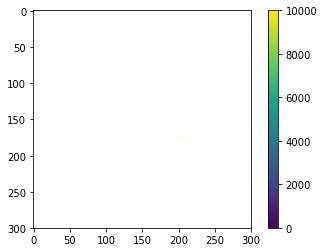

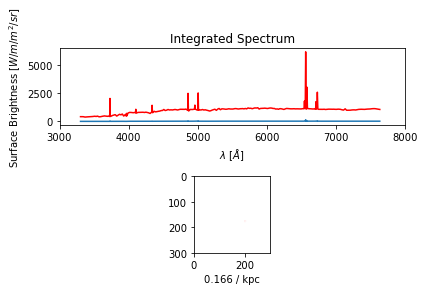

In [133]:
'''now trying to take that extracted spectrum and fit pPXF'''

xmin=150
xmax=200
ymin=175
ymax=225


y=extract_spec(xmin,xmax,ymin,ymax,0.01)
xs=y[0]
loglam_xs=[np.log10(x) for x in xs]
loglam_xs=np.array(loglam_xs)
spec_non_convolved=y[1]
spec_convolved=y[2]


plt.clf()



In [ ]:
'''create a loop to find the stellar velocity at all points'''
xmin=150
xmax=200
ymin=175
ymax=225

'''mask_2d=np.zeros((len(CAMERA0.data[:,0,0]),len(CAMERA0.data[0,:,0]),len(CAMERA0.data[0,0,:])))

#    masked_stel_vel=ma.masked_where((1/np.sqrt(data_stel_vel_ivar)) > 100 , data_stel_vel)
for i in range(len(CAMERA0.data[0,:,0])):
    for j in range(len(CAMERA0.data[0,0,:])):
        if (center_x-i)**2+(center_y-j)**2 < radius**2:
            x_coords.append(i)
            y_coords.append(j)
            new_cube.append(CAMERA0.data[:,i,j])

        else:
            mask_2d[:,j,i]=1
masked_cube= ma.masked_array(CAMERA0.data[:,:,:], mask=mask_2d)'''
stell_vel = np.zeros(len(CAMERA0.data[0,:,0]),len(CAMERA0.data[0,0,:]))
for i in range(len(CAMERA0.data[0,:,0])):
    for j in range(len(CAMERA0.data[0,0,:])):
        
        y=extract_spec(i,j,0.01)
        xs=y[0]
        spec_non_convolved=y[1]

        y=ppxf_from_J1354(xs, spec_non_convolved,'no', 1, 0.04,0,0.01)


        '''also calculate the redshift from this'''


        z_input=0.04
        c=2.99792458e5
        red_vel_input=c*np.log(1 + z_input)

        stell_vel[i,j]=(y[3]-red_vel_input)/(1+z_input)
        
  
    



input z 0.04
z 0


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:104: RuntimeWarning: invalid value encountered in sqrt


input vel 11758.0740007
Outliers: 553
Outliers: 6
Outliers: 2
Outliers: 1
Outliers: 552
Outliers: 5
Outliers: 2
Outliers: 2
Outliers: 1
Outliers: 552
Outliers: 3
Outliers: 4
Outliers: 2
Outliers: 1
Outliers: 554
Outliers: 3
Outliers: 2
Outliers: 2
Outliers: 1
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     11779       195     0.016    -0.020
chi2/DOF: 2.372
Function evaluations: 17 Status: 1
Nonzero Templates:  3  /  156
Formal errors:
     dV    dsigma   dh3      dh4
      10      11   0.033   0.046
Elapsed time in PPXF: 3.85 s


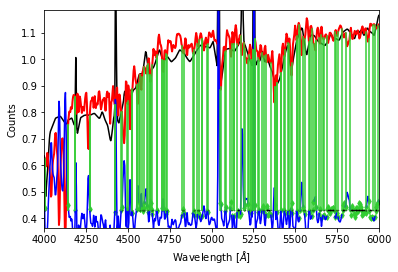

input z was 0.04
difference 11553.529643 23311.6036437 11758.0740007
zstars 0.0808622905757
stellar velocity offset 20.1641738624


In [132]:
import miles_util as lib
from scipy import ndimage
#noise of 0.01 is fairly typical of sdss right?
y=ppxf_from_J1354(xs, spec_non_convolved,'no', 1, 0.04,0,0.01)


'''also calculate the redshift from this'''

if y[4]==0:
    
    print('input z was 0')
    z_input=0.03
    c=2.99792458e5
    red_vel_input=c*np.log(1 + z_input)
    print('difference',( y[3]-red_vel_input), y[3], red_vel_input)

    '''So the redshift should be given by:
    z_stars=exp(all.VEL_STARS/ckm)-1.d0'''
    z_stars=np.exp( y[3]     /c)-1
    print('zstars',z_stars)

    print('stellar velocity offset', (y[3]-red_vel_input)/(1+z_input))
    #ppxf_example_population_gas_sdss()
else:
    print('input z was 0.04')
    z_input=0.04
    c=2.99792458e5
    red_vel_input=c*np.log(1 + z_input)
    
    vel_out=c*np.log(1+y[4])
    print('difference',( vel_out-red_vel_input), vel_out, red_vel_input)

    '''So the redshift should be given by:
    z_stars=exp(all.VEL_STARS/ckm)-1.d0'''
    z_stars=y[4]
    print('zstars',z_stars)

    print('stellar velocity offset', (y[3]-red_vel_input)/(1+z_input))
    #ppxf_example_population_gas_sdss()
    

In [131]:
def ppxf_from_J1354(xs,spec,plot, velscale_ratio, input_z, z, error_percent):
    file_dir = '/usr/local/Cellar/python/2.7.6/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ppxf'  # path of this procedure
    print('input z', input_z)
    print('z', z)
    
    xs=np.array(xs)
    
    mask = (xs > 3540) & (xs < 7409)
    
    gal_lin=np.array(spec[mask])
    new_xs=xs[mask]
    
    lam_gal=np.array(new_xs)
    
    
    
    
    x_1=np.linspace(0,len(lam_gal)-2,len(lam_gal)-1)
    fwhm_gal=[lam_gal[x+1]-lam_gal[x] for x in x_1]
    fwhm_gal.append(fwhm_gal[len(x_1)-1])
    fwhm_gal=np.array(fwhm_gal)
    
    if plot=='yes':
        plt.plot(lam_gal, fwhm_gal)
        plt.axhline(y=(lam_gal[-1]-lam_gal[0])/len(lam_gal))
        plt.annotate('Mean FWHM = '+str(round((lam_gal[-1]-lam_gal[0])/len(lam_gal),1)),xy=(0.7,0.9),xycoords='axes fraction')
        plt.xlabel('Lambdas')
        plt.ylabel('Interp FWHM')
        plt.show()
    
    
    lam_gal = lam_gal/(1+input_z) 
    fwhm_gal = fwhm_gal/(1+input_z)
    
    
    lamRange1=[lam_gal[0],lam_gal[-1]]
    

    
    
    #velscale = np.log(frac)*c       # Constant velocity scale in km/s per pixel
    galaxy, logLam1, velscale = util.log_rebin(lamRange1, gal_lin)
    galaxy = galaxy/np.median(galaxy)
    noise = galaxy*error_percent
    if plot=='yes':
        plt.clf()
        plt.plot(logLam1, galaxy, label='Galaxy')
        plt.plot(logLam1, noise, label='Noise')
        plt.show()
 
    #
    #lam_gal = lam_gal/(1+z)  # Compute approximate restframe wavelength
    #fwhm_gal = fwhm_gal/(1+z)   # Adjust resolution in Angstrom


    
    vazdekis = glob.glob(file_dir + '/miles_models/Mun1.30Z*.fits')
    fwhm_tem = 2.51 # Vazdekis+10 spectra have a constant resolution FWHM of 2.51A.

 
    hdu = fits.open(vazdekis[0])
    ssp = hdu[0].data
    h2 = hdu[0].header
    lam_temp = h2['CRVAL1'] + h2['CDELT1']*np.arange(h2['NAXIS1'])
    lamRange_temp = [lam_temp[0], lam_temp[-1]]
    
    sspNew_1,logLam2, velscale_temp = util.log_rebin(lamRange_temp, ssp, velscale=velscale/velscale_ratio)
    
    if plot=='yes':
        fig=plt.figure()
        ax1=fig.add_subplot(3,1,1)
        ax1.plot(lam_temp,ssp, label='before, linear', lw=1, color='turquoise')
        plt.legend()
        ax2=fig.add_subplot(3,1,2)
        ax2.plot(logLam1, galaxy,label='galaxy log', lw=1, color='blue')
        plt.legend()
        ax3=fig.add_subplot(3,1,3)
        ax3.plot(logLam2, sspNew_1,label='after log rebin', lw=1, color='blue')
        plt.legend()
        plt.show()
    
    templates = np.empty((sspNew_1.size, len(vazdekis)))

    # Interpolates the galaxy spectral resolution at the location of every pixel
    # of the templates. Outside the range of the galaxy spectrum the resolution
    # will be extrapolated, but this is irrelevant as those pixels cannot be
    # used in the fit anyway.
    #fwhm_gal = np.interp(lam_temp, lam_gal, fwhm_gal)
    
    
    #print('fwhm_gal', fwhm_gal)
    # Convolve the whole Vazdekis library of spectral templates
    # with the quadratic difference between the SDSS and the
    # Vazdekis instrumental resolution. Logarithmically rebin
    # and store each template as a column in the array TEMPLATES.

    # Quadratic sigma difference in pixels Vazdekis --> SDSS
    # The formula below is rigorously valid if the shapes of the
    # instrumental spectral profiles are well approximated by Gaussians.
    #
    # In the line below, the fwhm_dif is set to zero when fwhm_gal < fwhm_tem.
    # In principle it should never happen and a higher resolution template should be used.
    #
    fwhm_dif = np.sqrt(fwhm_gal**2 - fwhm_tem**2)
    sigma = fwhm_dif/2.355/h2['CDELT1'] # Sigma difference in pixels

    for j, fname in enumerate(vazdekis):
        hdu = fits.open(fname)
        ssp = hdu[0].data
        #ssp = util.gaussian_filter1d(ssp, sigma)  # perform convolution with variable sigma
        sspNew = util.log_rebin(lamRange_temp, ssp, velscale=velscale/velscale_ratio)[0]
        templates[:, j] = sspNew/np.median(sspNew) # Normalizes templates

    # The galaxy and the template spectra do not have the same starting wavelength.
    # For this reason an extra velocity shift DV has to be applied to the template
    # to fit the galaxy spectrum. We remove this artificial shift by using the
    # keyword VSYST in the call to PPXF below, so that all velocities are
    # measured with respect to DV. This assume the redshift is negligible.
    # In the case of a high-redshift galaxy one should de-redshift its
    # wavelength to the rest frame before using the line below (see above).
    #
    c = 299792.458
    dv = np.log(lam_temp[0]/lam_gal[0])*c    # km/s
    
  
   
    
    goodpixels = util.determine_goodpixels(logLam1, lamRange_temp, z)

    # Here the actual fit starts. The best fit is plotted on the screen.
    # Gas emission lines are excluded from the pPXF fit using the GOODPIXELS keyword.
    #
    vel = c*np.log(1 + input_z)   # Initial estimate of the galaxy velocity in km/s
   
    print('input vel', vel)
    start = [vel, 200.]  # (km/s), starting guess for [V, sigma]
    #start = [0,200]
    t = clock()

    pp = ppxf(templates, galaxy, noise, velscale, start,
              goodpixels=goodpixels, plot=True, moments=4,
              degree=-1, vsyst=dv, velscale_ratio=velscale_ratio,
              clean=True, lam=exp(logLam1))#was degree=12

    print("Formal errors:")
    print("     dV    dsigma   dh3      dh4")
    print("".join("%8.2g" % f for f in pp.error*np.sqrt(pp.chi2)))

    print('Elapsed time in PPXF: %.2f s' % (clock() - t))

    # If the galaxy is at significant redshift z and the wavelength has been
    # de-redshifted with the three lines "z = 1.23..." near the beginning of
    # this procedure, the best-fitting redshift is now given by the following
    # commented line (equation 2 of Cappellari et al. 2009, ApJ, 704, L34):
    #
    #print, 'Best-fitting redshift z:', (z + 1)*(1 + sol[0]/c) - 1

#------------------------------------------------------------------------------
    #plt.ylim([-1,2])
    plt.xlim([4000,6000])
    plt.show()
    if z_input ==0:
        red_alt=0
    else:
        red_alt=(z_input+1)*(1 +pp.sol[0]/c)-1
    return lam_gal, galaxy, pp.error[0], pp.sol[0], red_alt

In [ ]:
'''buffer cell'''

In [43]:



def ppxf_sauron_example(xs, spec, plot):
    plt.clf()
    file_dir = '/usr/local/Cellar/python/2.7.6/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ppxf'  # path of this procedure
    
    # Read a galaxy spectrum and define the wavelength range
    #
    #
    #file = file_dir + '/spectra/NGC4550_SAURON.fits'
    #hdu = fits.open(file)
    
    fig=plt.figure(figsize=(10.0,3.0))
    axs1=fig.add_subplot(1,3,1)
    axs1.plot(xs,spec)
    axs1.set_title('Raw')
 
    xs=np.array(xs)
    
    mask = (xs > 3540) & (xs < 7409)
    
    gal_lin = spec[mask]
   
    lambdas = xs[mask]
    
    
    axs2=fig.add_subplot(1,3,2)
    axs2.plot(lambdas,gal_lin)
    axs2.set_title('Masked')

    #CD=((xs_new[len(xs_new)-1]-xs_new[0])/len(xs_nes))
    lamRange1 = [min(lambdas),max(lambdas)]

    lambdas=xs
    lam_gal=xs
    

    FWHM_gal = 4.2  # SAURON has an instrumental resolution FWHM of 4.2A.

    # If the galaxy is at a significant redshift (z > 0.03), one would need to apply
    # a large velocity shift in PPXF to match the template to the galaxy spectrum.
    # This would require a large initial value for the velocity (V > 1e4 km/s)
    # in the input parameter START = [V,sig]. This can cause PPXF to stop!
    # The solution consists of bringing the galaxy spectrum roughly to the
    # rest-frame wavelength, before calling PPXF. In practice there is no
    # need to modify the spectrum before the usual LOG_REBIN, given that a
    # red shift corresponds to a linear shift of the log-rebinned spectrum.
    # One just needs to compute the wavelength range in the rest-frame
    # and adjust the instrumental resolution of the galaxy observations.
    # This is done with the following three commented lines:
    #
    # z = 1.23 # Initial estimate of the galaxy redshift
    # lamRange1 = lamRange1/(1+z) # Compute approximate restframe wavelength range
    # FWHM_gal = FWHM_gal/(1+z)   # Adjust resolution in Angstrom

    galaxy, logLam1, velscale = util.log_rebin(lamRange1, gal_lin)
    
    #
    #plt.show()
    #noise=np.sqrt(galaxy)/np.median(galaxy)
    galaxy = galaxy/max(galaxy)  # Normalize spectrum to avoid numerical issues
    #noise = np.full_like(galaxy, 0.05)           # Assume constant noise per pixel here#was 0.0047
    noise = 0.1*galaxy
    
    axs3=fig.add_subplot(1,3,3)
    axs3.plot(logLam1,galaxy)
    axs3.set_title('Logarithmic, Normalized')
    plt.tight_layout()
    plt.show()
    
    fig=plt.figure()
    ax1 = fig.add_subplot(211)
    ax1.plot(logLam1, galaxy, label='Data', color='red')
    ax1.plot(logLam1, noise, label='Noise', color='blue')
    plt.legend()
    # Read the list of filenames from the Single Stellar Population library
    # by Vazdekis (2010, MNRAS, 404, 1639) http://miles.iac.es/. A subset
    # of the library is included for this example with permission
    vazdekis = glob.glob(file_dir + '/miles_models/Mun1.30Z*.fits')
    FWHM_tem = 2.51  # Vazdekis+10 spectra have a constant resolution FWHM of 2.51A.
    velscale_ratio = 2  # adopts 2x higher spectral sampling for templates than for galaxy

    # Extract the wavelength range and logarithmically rebin one spectrum
    # to a velocity scale 2x smaller than the SAURON galaxy spectrum, to determine
    # the size needed for the array which will contain the template spectra.
    #
    hdu = fits.open(vazdekis[0])
    ssp = hdu[0].data
    h2 = hdu[0].header
    lamRange2 = h2['CRVAL1'] + np.array([0., h2['CDELT1']*(h2['NAXIS1'] - 1)])
    lam_temp = h2['CRVAL1'] + h2['CDELT1']*np.arange(h2['NAXIS1'])
    lamRange_temp = [np.min(lam_temp), np.max(lam_temp)]
    sspNew, logLam2, velscale_temp = util.log_rebin(lamRange2, ssp, velscale=velscale/velscale_ratio)
    templates = np.empty((sspNew.size, len(vazdekis)))

    ax2 = fig.add_subplot(212)
    ax2.plot(logLam2, sspNew, color='orange',label='Template')
    plt.legend()
    plt.show()
    # Convolve the whole Vazdekis library of spectral templates
    # with the quadratic difference between the SAURON and the
    # Vazdekis instrumental resolution. Logarithmically rebin
    # and store each template as a column in the array TEMPLATES.

    # Quadratic sigma difference in pixels Vazdekis --> SAURON
    # The formula below is rigorously valid if the shapes of the
    # instrumental spectral profiles are well approximated by Gaussians.
    #
    FWHM_dif = np.sqrt(FWHM_gal**2 - FWHM_tem**2)
    sigma = FWHM_dif/2.355/h2['CDELT1']  # Sigma difference in pixels

    for j, file in enumerate(vazdekis):
        hdu = fits.open(file)
        ssp = hdu[0].data
        ssp = ndimage.gaussian_filter1d(ssp, sigma)
        sspNew, logLam2, velscale_temp = util.log_rebin(lamRange2, ssp, velscale=velscale/velscale_ratio)
        templates[:, j] = sspNew/np.median(sspNew)  # Normalizes templates

    # The galaxy and the template spectra do not have the same starting wavelength.
    # For this reason an extra velocity shift DV has to be applied to the template
    # to fit the galaxy spectrum. We remove this artificial shift by using the
    # keyword VSYST in the call to PPXF below, so that all velocities are
    # measured with respect to DV. This assume the redshift is negligible.
    # In the case of a high-redshift galaxy one should de-redshift its
    # wavelength to the rest frame before using the line below (see above).
    #
    c = 299792.458
    if velscale_ratio > 1:
        dv = (np.mean(logLam2[:velscale_ratio]) - logLam1[0])*c  # km/s
    else:
        dv = (logLam2[0] - logLam1[0])*c  # km/s

    vel = 0.  # Initial estimate of the galaxy velocity in km/s
    z = np.exp(vel/c) - 1   # Relation between velocity and redshift in pPXF
    print('this is your z', z)
    goodPixels = util.determine_goodpixels(logLam1, lamRange_temp, z)
    #print('goodPixels', goodPixels)

    # Here the actual fit starts. The best fit is plotted on the screen.
    # Gas emission lines are excluded from the pPXF fit using the GOODPIXELS keyword.
    #
    start = [vel, 200.]  # (km/s), starting guess for [V, sigma]
    t = clock()

    pp = ppxf(templates, galaxy, noise, velscale, start,
               plot=True, moments=4,
              degree=4, vsyst=dv, velscale_ratio=velscale_ratio)

    print("Formal errors:")
    print("     dV    dsigma   dh3      dh4")
    print("".join("%8.2g" % f for f in pp.error*np.sqrt(pp.chi2)))

    print('Elapsed time in PPXF: %.2f s' % (clock() - t))
    savefig('../ppxf_sunrise_sauron.pdf')
    # If the galaxy is at significant redshift z and the wavelength has been
    # de-redshifted with the three lines "z = 1.23..." near the beginning of
    # this procedure, the best-fitting redshift is now given by the following
    # commented line (equation 2 of Cappellari et al. 2009, ApJ, 704, L34;
    # http://adsabs.harvard.edu/abs/2009ApJ...704L..34C)
    #
    #print, 'Best-fitting redshift z:', (z + 1)*(1 + sol[0]/c) - 1


def ppxf_my_gal(xs, spec,plot):   
    file_dir = '/usr/local/Cellar/python/2.7.6/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ppxf'  # path of this procedure

 
    z = 0.0   # SDSS redshift estimate
    xs=np.array(xs)
    mask = (xs > (3540)) & (xs < (7409))
    #mask = (xs > (3600)) & (xs < (5650))
    #mask = (xs > 3540) & (xs < 7409)
    lambdas=xs[mask]
    
    
    flux = spec[mask]

    var = np.sqrt(flux)#poisson noise? For now, this might be a fair assumption
    var_scaled=var/np.median(flux)
    
    galaxy = np.array(flux/np.median(flux))  # Normalize spectrum to avoid numerical issues
    
    var_scaled=0.1*galaxy
    lam_gal = lambdas
    
    if plot=='yes':
        plt.title('Testing variance and flux')
        plt.plot(lam_gal,galaxy, label='Flux')
        plt.plot(lam_gal, var_scaled, label='Noise')
        plt.legend()
        plt.show()
    
    
    #noise = np.full_like(galaxy, 0.0166)       # Assume constant noise per pixel here
    noise = var_scaled

    c = 299792.458                  # speed of light in km/s
    frac = lam_gal[1]/lam_gal[0]    # Constant lambda fraction per pixel
    dlam_gal = (frac - 1)*lam_gal   # Size of every pixel in Angstrom
    #wdisp = t['wdisp'][mask]        # Intrinsic dispersion of every pixel, in pixels units
    #print('wdisp',len(wdisp), 'lam_gal', len(lam_gal))
    #fwhm_gal = 2.355*wdisp*dlam_gal # Resolution FWHM of every pixel, in Angstroms
    
    x_1=np.linspace(0,len(lam_gal)-2,len(lam_gal)-1)
    fwhm_gal=[lam_gal[x+1]-lam_gal[x] for x in x_1]
    fwhm_gal.append(fwhm_gal[len(x_1)-1])
    
    if plot=='yes':
        plt.plot(lam_gal, fwhm_gal)
        plt.axhline(y=(lam_gal[len(x_1)]-lam_gal[0])/len(galaxy))
        plt.xlabel('Lambdas')
        plt.ylabel('Interp FWHM')
        plt.show()
        
    fwhm_gal=np.array(fwhm_gal)
    
    convolved= util.gaussian_filter1d(galaxy, fwhm_gal)  # perform convolution with variable sigma
    if plot=='yes':
        plt.plot(lam_gal, convolved)
        plt.show()
    velscale = np.log(frac)*c       # Constant velocity scale in km/s per pixel
    velscale_ratio=1#1.5
    #
    #lam_gal = lam_gal/(1+z)  # Compute approximate restframe wavelength
    #fwhm_gal = fwhm_gal/(1+z)   # Adjust resolution in Angstrom

    # Read the list of filenames from the Single Stellar Population library
    # by Vazdekis (2010, MNRAS, 404, 1639) http://miles.iac.es/. A subset
    # of the library is included for this example with permission
    vazdekis = glob.glob(file_dir + '/miles_models/Mun1.30Z*.fits')
    fwhm_tem = 2.51 # Vazdekis+10 spectra have a constant resolution FWHM of 2.51A.

    # Extract the wavelength range and logarithmically rebin one spectrum
    # to the same velocity scale of the SDSS galaxy spectrum, to determine
    # the size needed for the array which will contain the template spectra.
    #
    hdu = fits.open(vazdekis[0])
    ssp = hdu[0].data
    h2 = hdu[0].header
    lam_temp = h2['CRVAL1'] + h2['CDELT1']*np.arange(h2['NAXIS1'])
    lamRange2 = h2['CRVAL1'] + np.array([0., h2['CDELT1']*(h2['NAXIS1'] - 1)])
    lamRange_temp = [np.min(lam_temp), np.max(lam_temp)]
    #sspNew, logLam2, velscale_temp = util.log_rebin(lamRange_temp, ssp, velscale=velscale/velscale_ratio)
    sspNew = util.log_rebin(lamRange_temp, ssp, velscale=velscale)[0]
    
    
    templates = np.empty((sspNew.size, len(vazdekis)))

    # Interpolates the galaxy spectral resolution at the location of every pixel
    # of the templates. Outside the range of the galaxy spectrum the resolution
    # will be extrapolated, but this is irrelevant as those pixels cannot be
    # used in the fit anyway.
    fwhm_gal = np.interp(lam_temp, lam_gal, fwhm_gal)
    
    
    #print('fwhm_gal', fwhm_gal)
    # Convolve the whole Vazdekis library of spectral templates
    # with the quadratic difference between the SDSS and the
    # Vazdekis instrumental resolution. Logarithmically rebin
    # and store each template as a column in the array TEMPLATES.

    # Quadratic sigma difference in pixels Vazdekis --> SDSS
    # The formula below is rigorously valid if the shapes of the
    # instrumental spectral profiles are well approximated by Gaussians.
    #
    # In the line below, the fwhm_dif is set to zero when fwhm_gal < fwhm_tem.
    # In principle it should never happen and a higher resolution template should be used.
    #
    fwhm_dif = np.sqrt((fwhm_gal**2 - fwhm_tem**2).clip(0))
    sigma = fwhm_dif/2.355/h2['CDELT1'] # Sigma difference in pixels

    for j, fname in enumerate(vazdekis):
        hdu = fits.open(fname)
        
        ssp = hdu[0].data
        if plot=='yes':
            plt.plot(ssp)
        ssp = util.gaussian_filter1d(ssp, sigma)  # perform convolution with variable sigma
        sspNew = util.log_rebin(lamRange_temp, ssp, velscale=velscale)[0]
        templates[:, j] = sspNew/np.median(sspNew) # Normalizes templates
        if plot=='yes':
            plt.plot(ssp)
    
    
    plt.show()
    
    if plot=='yes':
        fig=plt.figure()
        ax1=fig.add_subplot(211)
        ax1.plot(lam_gal, convolved, label='Gal')
        #ax1.set_xlim([5850,5950])
        #ax1.set_ylim([0.5,2.0])
        ax2=fig.add_subplot(212)
        ax2.plot(lam_temp, ssp, label='Template')
        #ax2.set_xlim([5850,5950])
        plt.legend()
        plt.show()
    # The galaxy and the template spectra do not have the same starting wavelength.
    # For this reason an extra velocity shift DV has to be applied to the template
    # to fit the galaxy spectrum. We remove this artificial shift by using the
    # keyword VSYST in the call to PPXF below, so that all velocities are
    # measured with respect to DV. This assume the redshift is negligible.
    # In the case of a high-redshift galaxy one should de-redshift its
    # wavelength to the rest frame before using the line below (see above).
    #
    c = 299792.458
    dv = np.log(lam_temp[0]/lam_gal[0])*c    # km/s
    
    goodpixels = util.determine_goodpixels(np.log(lam_gal), lamRange_temp, z)

    # Here the actual fit starts. The best fit is plotted on the screen.
    # Gas emission lines are excluded from the pPXF fit using the GOODPIXELS keyword.
    #
    vel = c*np.log(1 + z)   # Initial estimate of the galaxy velocity in km/s
    start = [vel, 200.]  # (km/s), starting guess for [V, sigma]
    
    t = clock()
    
  
    
    print(len(galaxy), shape(templates))
    pp = ppxf(templates, convolved, noise, velscale, start,
              goodpixels=goodpixels, plot=True, moments=4,
              degree=4, clean=False, lam=lam_gal)#was degree=12

    print("Formal errors:")
    print("     dV    dsigma   dh3      dh4")
    print("".join("%8.2g" % f for f in pp.error*np.sqrt(pp.chi2)))

    print('Elapsed time in PPXF: %.2f s' % (clock() - t))

    # If the galaxy is at significant redshift z and the wavelength has been
    # de-redshifted with the three lines "z = 1.23..." near the beginning of
    # this procedure, the best-fitting redshift is now given by the following
    # commented line (equation 2 of Cappellari et al. 2009, ApJ, 704, L34):
    #
    #print, 'Best-fitting redshift z:', (z + 1)*(1 + sol[0]/c) - 1

#------------------------------------------------------------------------------
    #if plot=='yes':
    #plt.ylim([0,0.5])
    plt.annotate(r'$\chi^2$ ='+str(round(pp.chi2,1)), xy=(0.1,0.95),xycoords='axes fraction')
    plt.annotate(r'Velocity ='+str(round(pp.sol[0],1))+' $\pm$ '+str(round(pp.error[0],1)), xy=(0.1,0.9),xycoords='axes fraction')
    savefig('../ppxf_sunrise_notlog.pdf')
    return lam_gal, galaxy,pp.chi2,pp.sol[0], pp.error[0]




def ppxf_my_gal_log(xs, spec,plot):   
    file_dir = '/usr/local/Cellar/python/2.7.6/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ppxf'  # path of this procedure

 
    z = 0.0   # SDSS redshift estimate
    xs=np.array(xs)
    mask = (xs > (3540)) & (xs < (7409))
    #mask = (xs > (3600)) & (xs < (5650))
    #mask = (xs > 3540) & (xs < 7409)
    lambdas=xs[mask]
    
    
    flux = spec[mask]

    var = np.sqrt(flux)#poisson noise? For now, this might be a fair assumption
    #var_scaled=var/np.median(flux)
    
    #galaxy = np.array(flux/np.median(flux))  # Normalize spectrum to avoid numerical issues
    #var_scaled=0.1*galaxy
    lam_gal = lambdas


    c = 299792.458                  # speed of light in km/s
    
    
    
    x_1=np.linspace(0,len(lam_gal)-2,len(lam_gal)-1)
    fwhm_gal=[lam_gal[x+1]-lam_gal[x] for x in x_1]
    fwhm_gal.append(fwhm_gal[len(x_1)-1])
    
    if plot=='yes':
        plt.plot(lam_gal, fwhm_gal)
        plt.axhline(y=(lam_gal[len(x_1)]-lam_gal[0])/len(lam_gal))
        plt.xlabel('Lambdas')
        plt.ylabel('Interp FWHM')
        plt.show()
        
    lamRange1=[lambdas[0],lambdas[len(lambdas)-1]]
  
    galaxy, logLam1, velscale = util.log_rebin(lamRange1, flux)
    noise, logLam1, velscale1 = util.log_rebin(lamRange1, var)
    
    
    galaxy = galaxy/np.median(galaxy)  # Normalize spectrum to avoid numerical issues
    #noise = np.full_like(galaxy, 0.0047)           # Assume constant noise per pixel here
    
    #noise = noise/np.median(galaxy)
    noise=galaxy*0.2
    if plot=='yes':
        fig=plt.figure()
        ax1 = fig.add_subplot(311)
        ax1.plot(logLam1, galaxy, label='Data', color='red')
        plt.legend()
        ax3 = fig.add_subplot(312)
        ax3.plot(logLam1, noise, label='Noise', color='orange')
        plt.legend()
    
    #velscale = np.log(frac)*c       # Constant velocity scale in km/s per pixel
    velscale_ratio=10#1.5
    #
    #lam_gal = lam_gal/(1+z)  # Compute approximate restframe wavelength
    #fwhm_gal = fwhm_gal/(1+z)   # Adjust resolution in Angstrom

    # Read the list of filenames from the Single Stellar Population library
    # by Vazdekis (2010, MNRAS, 404, 1639) http://miles.iac.es/. A subset
    # of the library is included for this example with permission
    vazdekis = glob.glob(file_dir + '/miles_models/Mun1.30Z*.fits')
    fwhm_tem = 2.51 # Vazdekis+10 spectra have a constant resolution FWHM of 2.51A.

    # Extract the wavelength range and logarithmically rebin one spectrum
    # to the same velocity scale of the SDSS galaxy spectrum, to determine
    # the size needed for the array which will contain the template spectra.
    #
    hdu = fits.open(vazdekis[0])
    ssp = hdu[0].data
    h2 = hdu[0].header
    lam_temp = h2['CRVAL1'] + h2['CDELT1']*np.arange(h2['NAXIS1'])
    lamRange2 = h2['CRVAL1'] + np.array([0., h2['CDELT1']*(h2['NAXIS1'] - 1)])
    lamRange_temp = [np.min(lam_temp), np.max(lam_temp)]
    sspNew, logLam2, velscale_temp = util.log_rebin(lamRange2, ssp, velscale=velscale/velscale_ratio)
    if plot=='yes':
        ax2 = fig.add_subplot(313)
        ax2.plot(logLam2, sspNew, color='orange',label='Template')
        plt.legend()
        plt.show()
    
    templates = np.empty((sspNew.size, len(vazdekis)))

    # Interpolates the galaxy spectral resolution at the location of every pixel
    # of the templates. Outside the range of the galaxy spectrum the resolution
    # will be extrapolated, but this is irrelevant as those pixels cannot be
    # used in the fit anyway.
    fwhm_gal = np.interp(lam_temp, lam_gal, fwhm_gal)
    
    
    #print('fwhm_gal', fwhm_gal)
    # Convolve the whole Vazdekis library of spectral templates
    # with the quadratic difference between the SDSS and the
    # Vazdekis instrumental resolution. Logarithmically rebin
    # and store each template as a column in the array TEMPLATES.

    # Quadratic sigma difference in pixels Vazdekis --> SDSS
    # The formula below is rigorously valid if the shapes of the
    # instrumental spectral profiles are well approximated by Gaussians.
    #
    # In the line below, the fwhm_dif is set to zero when fwhm_gal < fwhm_tem.
    # In principle it should never happen and a higher resolution template should be used.
    #
    fwhm_dif = np.sqrt((fwhm_gal**2 - fwhm_tem**2).clip(0))
    sigma = fwhm_dif/2.355/h2['CDELT1'] # Sigma difference in pixels

    for j, fname in enumerate(vazdekis):
        hdu = fits.open(fname)
        ssp = hdu[0].data
        ssp = util.gaussian_filter1d(ssp, sigma)  # perform convolution with variable sigma
        sspNew = util.log_rebin(lamRange_temp, ssp, velscale=velscale/velscale_ratio)[0]
        sspNew, logLam2, velscale_temp = util.log_rebin(lamRange2, ssp, velscale=velscale/velscale_ratio)
        templates[:, j] = sspNew/np.median(sspNew) # Normalizes templates
    
    if plot=='yes':
        fig=plt.figure()
        ax1=fig.add_subplot(211)
        ax1.plot(lam_gal, galaxy, label='Gal')
        #ax1.set_xlim([5850,5950])
        #ax1.set_ylim([0.5,2.0])
        ax2=fig.add_subplot(212)
        ax2.plot(lam_temp, ssp, label='Template')
        #ax2.set_xlim([5850,5950])
        plt.legend()
        plt.show()
    # The galaxy and the template spectra do not have the same starting wavelength.
    # For this reason an extra velocity shift DV has to be applied to the template
    # to fit the galaxy spectrum. We remove this artificial shift by using the
    # keyword VSYST in the call to PPXF below, so that all velocities are
    # measured with respect to DV. This assume the redshift is negligible.
    # In the case of a high-redshift galaxy one should de-redshift its
    # wavelength to the rest frame before using the line below (see above).
    #
    c = 299792.458
    if velscale_ratio > 1:
        dv = (np.mean(logLam2[:velscale_ratio]) - logLam1[0])*c  # km/s
    else:
        dv = (logLam2[0] - logLam1[0])*c  # km/s

    vel = 450.  # Initial estimate of the galaxy velocity in km/s
    #z = np.exp(vel/c) - 1   # Relation between velocity and redshift in pPXF
    vel = c*np.log(1 + z)   # Initial estimate of the galaxy velocity in km/s
    goodPixels = util.determine_goodpixels(np.log(lam_gal), lamRange_temp, z)

    # Here the actual fit starts. The best fit is plotted on the screen.
    # Gas emission lines are excluded from the pPXF fit using the GOODPIXELS keyword.
    #
   
    start = [vel, 200.]  # (km/s), starting guess for [V, sigma]
    t = clock()
    if plot=='yes':
        plt.plot(lam_temp,ssp)
        plt.plot(lam_gal,galaxy)
        plt.plot(lam_gal,noise)
        plt.show()
    plt.clf()
    
    print('shape gal', shape(galaxy), len(galaxy))
    print('shape temp', shape(templates))
    
    pp = ppxf(templates, galaxy, noise, velscale, start,
              goodpixels=goodPixels, plot=True, moments=4,
              degree=4, vsyst=dv, velscale_ratio=velscale_ratio)

    
    '''pp = ppxf(templates, galaxy, noise, velscale, start,
              goodpixels=goodpixels, plot=True, moments=4,
              degree=4, vsyst=dv, velscale_ratio=velscale_ratio, clean=False, lam=lam_gal)#was degree=12'''

    print("Formal errors:")
    print("     dV    dsigma   dh3      dh4")
    print("".join("%8.2g" % f for f in pp.error*np.sqrt(pp.chi2)))

    print('Elapsed time in PPXF: %.2f s' % (clock() - t))

    # If the galaxy is at significant redshift z and the wavelength has been
    # de-redshifted with the three lines "z = 1.23..." near the beginning of
    # this procedure, the best-fitting redshift is now given by the following
    # commented line (equation 2 of Cappellari et al. 2009, ApJ, 704, L34):
    #
    #print, 'Best-fitting redshift z:', (z + 1)*(1 + sol[0]/c) - 1

#------------------------------------------------------------------------------
    #if plot=='yes':
    #plt.ylim([0,0.5])
    plt.annotate(r'$\chi^2$ ='+str(round(pp.chi2,1)), xy=(0.1,0.95),xycoords='axes fraction')
    plt.annotate(r'Velocity ='+str(round(pp.sol[0],1))+' $\pm$ '+str(round(pp.error[0],1)), xy=(0.1,0.9),xycoords='axes fraction')
    savefig('../ppxf_sunrise_log.pdf')
    return lam_gal, galaxy,pp.chi2,pp.sol[0], pp.error[0]





def ppxf_example_population_gas_sdss():

    file_dir = '/usr/local/Cellar/python/2.7.6/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ppxf'  # path of this procedure
    
    # Read SDSS DR8 galaxy spectrum taken from here http://www.sdss3.org/dr8/
    # The spectrum is *already* log rebinned by the SDSS DR8
    # pipeline and log_rebin should not be used in this case.
    #
    file = file_dir + '/spectra/NGC3522_SDSS_DR8.fits'
    hdu = fits.open(file)
    t = hdu[1].data
    z = float(hdu[1].header["Z"]) # SDSS redshift estimate

    # Only use the wavelength range in common between galaxy and stellar library.
    #
    mask = (t['wavelength'] > 3540) & (t['wavelength'] < 7409)
    flux = t['flux'][mask]
    galaxy = flux/np.median(flux)   # Normalize spectrum to avoid numerical issues
    wave = t['wavelength'][mask]

    # The SDSS wavelengths are in vacuum, while the MILES ones are in air.
    # For a rigorous treatment, the SDSS vacuum wavelengths should be
    # converted into air wavelengths and the spectra should be resampled.
    # To avoid resampling, given that the wavelength dependence of the
    # correction is very weak, I approximate it with a constant factor.
    #
    wave *= np.median(util.vac_to_air(wave)/wave)

    # The noise level is chosen to give Chi^2/DOF=1 without regularization (REGUL=0).
    # A constant noise is not a bad approximation in the fitted wavelength
    # range and reduces the noise in the fit.
    #
    noise = np.full_like(galaxy, 0.01635)           # Assume constant noise per pixel here

    # The velocity step was already chosen by the SDSS pipeline
    # and we convert it below to km/s
    #
    c = 299792.458 # speed of light in km/s
    velscale = c*np.log(wave[1]/wave[0])
    FWHM_gal = 2.76 # SDSS has an approximate instrumental resolution FWHM of 2.76A.

    #------------------- Setup templates -----------------------

    pathname = file_dir + '/miles_models/Mun1.30*.fits'
    miles = lib.miles(pathname, velscale, FWHM_gal)

    # The stellar templates are reshaped into a 2-dim array with each spectrum
    # as a column, however we save the original array dimensions, which are
    # needed to specify the regularization dimensions
    #
    reg_dim = miles.templates.shape[1:]
    stars_templates = miles.templates.reshape(miles.templates.shape[0], -1)

    # See the pPXF documentation for the keyword REGUL,
    regul_err = 0.0036  # Desired regularization error

    # Construct a set of Gaussian emission line templates.
    # Estimate the wavelength fitted range in the rest frame.
    #
    lam_range_gal = np.array([np.min(wave), np.max(wave)])/(1 + z)
    gas_templates, line_names, line_wave =         util.emission_lines(miles.log_lam_temp, lam_range_gal, FWHM_gal)

    # Combines the stellar and gaseous templates into a single array
    # during the PPXF fit they will be assigned a different kinematic
    # COMPONENT value
    #
    templates = np.column_stack([stars_templates, gas_templates])

    #-----------------------------------------------------------

    # The galaxy and the template spectra do not have the same starting wavelength.
    # For this reason an extra velocity shift DV has to be applied to the template
    # to fit the galaxy spectrum. We remove this artificial shift by using the
    # keyword VSYST in the call to PPXF below, so that all velocities are
    # measured with respect to DV. This assume the redshift is negligible.
    # In the case of a high-redshift galaxy one should de-redshift its
    # wavelength to the rest frame before using the line below as described
    # in PPXF_EXAMPLE_KINEMATICS_SAURON.
    #
    c = 299792.458
    dv = c*(miles.log_lam_temp[0] - np.log(wave[0])) # km/s
    vel = c*np.log(1 + z) # Relation between redshift and velocity in pPXF

    # Here the actual fit starts. The best fit is plotted on the screen.
    #
    # IMPORTANT: Ideally one would like not to use any polynomial in the fit
    # as the continuum shape contains important information on the population.
    # Unfortunately this is often not feasible, due to small calibration
    # uncertainties in the spectral shape. To avoid affecting the line strength of
    # the spectral features, we exclude additive polynomials (DEGREE=-1) and only use
    # multiplicative ones (MDEGREE=10). This is only recommended for population, not
    # for kinematic extraction, where additive polynomials are always recommended.
    #
    start = [vel, 180.]  # (km/s), starting guess for [V, sigma]

    t = clock()

    # Assign component=0 to the stellar templates and
    # component=1 to the gas emission lines templates.
    # One can easily assign different kinematic components to different gas species
    # e.g. component=1 for the Balmer series, component=2 for the [OIII] doublet, ...)
    # Input a negative MOMENTS value to keep fixed the LOSVD of a component.
    #
    nTemps = stars_templates.shape[1]
    nLines = gas_templates.shape[1]
    component = [0]*nTemps + [1]*nLines
    moments = [4, 2]  # fit (V, sig, h3, h4) for the stars and (V, sig) for the gas
    start = [start, start]  # adopt the same starting value for both gas and stars

    pp = ppxf(templates, galaxy, noise, velscale, start,
              plot=False, moments=moments, degree=-1, mdegree=10, vsyst=dv,
              clean=False, regul=1./regul_err, reg_dim=reg_dim, component=component)

    # When the two Delta Chi^2 below are the same, the solution is the smoothest
    # consistent with the observed spectrum.
    #
    print('Desired Delta Chi^2: %.4g' % np.sqrt(2*galaxy.size))
    print('Current Delta Chi^2: %.4g' % ((pp.chi2 - 1)*galaxy.size))
    print('Elapsed time in PPXF: %.2f s' % (clock() - t))

    gas = np.array(component) == 1  # Select weights of gas emissions only
    print('++++++++++++++++++++++++++++++')
    print('Gas V=%.4g and sigma=%.2g km/s' % (pp.sol[1][0], pp.sol[1][1]))  # component=1
    print('Emission lines fluxes:')
    for name, weight, line in zip(line_names, pp.weights[gas], pp.matrix[:, gas].T):
        print('%12s: %.3g' % (name, weight*np.sum(line)))
    print('------------------------------')

    weights = pp.weights[~gas]  # Exclude weights of the gas templates
    weights = weights.reshape(reg_dim)/weights.sum()  # Normalized

    miles.mean_age_metal(weights)
    miles.mass_to_light(weights, band="r")

    # Plot fit results for stars and gas
    plt.clf()
    plt.subplot(211)
    plt.plot(wave, pp.galaxy, 'k')
    plt.plot(wave, pp.bestfit, 'b', linewidth=2)
    plt.xlabel("Observed Wavelength ($\AA$)")
    plt.ylabel("Relative Flux")
    plt.ylim([-0.1, 1.3])
    plt.xlim([np.min(wave), np.max(wave)])
    plt.plot(wave, pp.galaxy-pp.bestfit, 'd', ms=4, color='LimeGreen', mec='LimeGreen') # fit residuals
    plt.axhline(y=-0, linestyle='--', color='k', linewidth=2)
    stars = pp.matrix[:, ~gas].dot(pp.weights[~gas])
    plt.plot(wave, stars, 'r', linewidth=2)  # overplot stellar templates alone
    gas = pp.matrix[:, gas].dot(pp.weights[gas])
    plt.plot(wave, gas+0.15, 'b', linewidth=2)  # overplot emission lines alone

    # Plot stellar population mass fraction distribution
    plt.subplot(212)
    miles.plot(weights)
    plt.tight_layout()
    savefig('../gas_emission_lines_sdss.pdf')

In [203]:
help 

Type help() for interactive help, or help(object) for help about object.

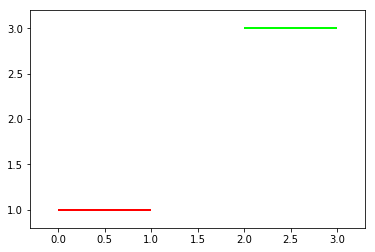

In [12]:
import numpy as np
import pylab as pl
from matplotlib import collections  as mc
plt.clf()

lines = [[(0, 1), (1, 1)],[(2, 3), (3, 3)]]
c = np.array([(1, 0, 0, 1),(0, 1, 0, 1)])

lc = mc.LineCollection(lines, colors=c, linewidths=2)
fig, ax = pl.subplots()
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)
plt.show()

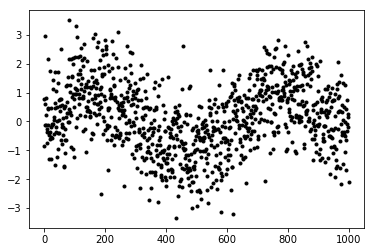

In [13]:
'''convolution example'''
import numpy as np
import matplotlib.pyplot as plt

from astropy.convolution import Gaussian1DKernel
from astropy.convolution import convolve

# Generate fake data
x = np.arange(1000).astype(float)
y = np.sin(x / 100.) + np.random.normal(0., 1., x.shape)

# Create kernel
g = Gaussian1DKernel(50)

# Convolve data
z = convolve(y, g, boundary='extend')

# Plot data before and after convolution
plt.plot(x, y, 'k.')
#plt.plot(x, z)
plt.show()

kernel 3.9263377993337154


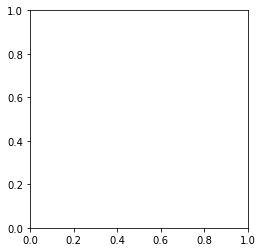

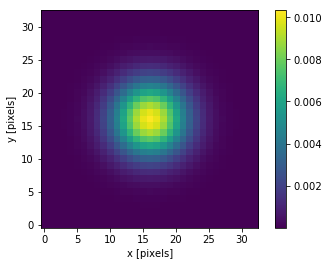

In [22]:
'''This is the Gaussian 2d Kernel you want ot use'''
import matplotlib.pyplot as plt
from astropy.convolution import Gaussian2DKernel
'''Convert a 2.54" FWHM thing into pixels and standard deviation'''

sigma=2.54/2.355
##kpc/pix is the pixelscale
##conversion factor is kpc/"
kernel_sigma_pix=(sigma*(kpc_arcmin.value/60))/pixelscale
print('kernel', kernel_sigma_pix)

gaussian_2D_kernel = Gaussian2DKernel(kernel_sigma_pix)
plt.imshow(gaussian_2D_kernel, interpolation='none', origin='lower')
plt.xlabel('x [pixels]')
plt.ylabel('y [pixels]')
plt.colorbar()
plt.show()

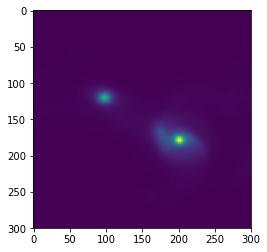

In [23]:
from astropy.convolution import convolve, convolve_fft


result = convolve(np.sum(CAMERA0.data[:,:,:],axis=0), gaussian_2D_kernel)
result_2 = convolve_fft(np.sum(CAMERA0.data[:,:,:],axis=0), gaussian_2D_kernel)

plt.imshow(result)
plt.show()


outfile = 'q0.5_fg0.3_allrx10/test_out_convolved.fits'
hdu = fits.PrimaryHDU(np.flipud(result))
hdu.writeto(outfile, clobber=True)

In [3]:
'''this is to to create beautiful images of the galfit modeling'''
galfit=pyfits.open('q0.5_fg0.3_allrx10/imgblock.fits')

In [28]:
galfit_input=galfit[1].data
galfit_model=galfit[2].data
galfit_resid=galfit[3].data
fig=plt.figure()

ax1 = fig.add_subplot(131, aspect='equal')
ax1.set_title('Data')

pixelscale=0.166666#kpc/pix
#spacing=((kpc_arcmin.value/60))/pixelscale
#axis is 100x100 pixels
ticklocs=[0,25,50,75,100]

kpc=[round(pixelscale*(x-50),1) for x in ticklocs]

ax1.imshow(galfit_input[75:175,150:250], vmin=0, vmax=50)
ax1.set_xticks(ticklocs)
ax1.set_xticklabels(kpc)
ax1.set_yticks(ticklocs)
ax1.set_yticklabels(kpc)


ax2 = fig.add_subplot(132, aspect='equal')
ax2.set_title('Galfit Model')
ax2.imshow(galfit_model[75:175,150:250], vmin=0, vmax=50)
ax2.set_xticks(ticklocs)
ax2.set_xticklabels(kpc)
ax2.set_yticks(ticklocs)
ax2.set_yticklabels(kpc)


ax3 = fig.add_subplot(133, aspect='equal')
ax3.set_title('Residuals')
ax3.imshow(galfit_resid[75:175,150:250], vmin=0, vmax=50)
ax3.set_xticks(ticklocs)
ax3.set_xticklabels(kpc)
ax3.set_yticks(ticklocs)
ax3.set_yticklabels(kpc)
plt.tight_layout()
savefig('../MaNGA_papers/Paper_I/Galfit_ex.pdf')

tight_layout : falling back to Agg renderer
